In [1]:
import os
import sys

# Add ../src to the list of available Python packages
module_path = os.path.abspath(os.path.join('..', 'src'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

In [2]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

from docknet.docknet import Docknet
from docknet.data_generator.chessboard_data_generator import ChessboardDataGenerator
from docknet.initializer.random_normal_initializer import RandomNormalInitializer
from docknet.optimizer.gradient_descent_optimizer import GradientDescentOptimizer
from docknet.optimizer.adam_optimizer import AdamOptimizer

In [3]:
def scatterplot(axe, X, Y, title, files, rows, index, x0_range, x1_range):
    axe.scatter(X[0, :], X[1, :], c=Y[0:], s=2)
    aspect = (x0_range[1] - x0_range[0]) / (x1_range[1] - x1_range[0])
    axe.set_aspect(aspect)
    axe.set_title(title)
    axe.set_xlim(x0_range)
    axe.set_ylim(x1_range)
    axe.set_xlabel('x0')
    axe.set_ylabel('x1')

In [4]:
train_size = 2000
test_size = 400
x0_range = (-5., 5.)
x1_range = (-5., 5.)

In [5]:
data_generator = ChessboardDataGenerator(x0_range, x1_range)
X_train, Y_train = data_generator.generate_balanced_shuffled_sample(train_size)
X_test, Y_test = data_generator.generate_balanced_shuffled_sample(test_size)

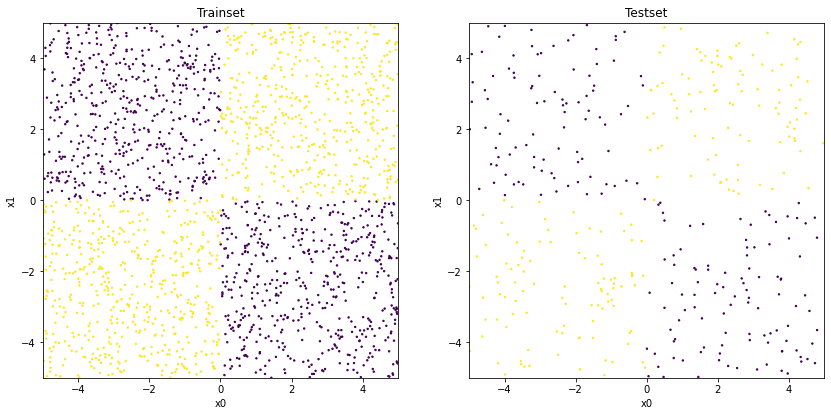

In [6]:
plt.rcParams['figure.figsize'] = [14, 7]
f, axes = plt.subplots(nrows=1, ncols=2)
scatterplot(axes[0], X_train, Y_train, 'Trainset', 1, 2, 1, x0_range, x1_range)
scatterplot(axes[1], X_test, Y_test, 'Testset', 1, 2, 2, x0_range, x1_range)
plt.show()

In [7]:
docknet = Docknet()
docknet.add_input_layer(2)
docknet.add_dense_layer(6, 'relu')
docknet.add_dense_layer(1, 'sigmoid')
docknet.initializer = RandomNormalInitializer()
docknet.cost_function = 'cross_entropy'
docknet.optimizer = AdamOptimizer()

In [8]:
np.random.seed(1)
epochs = 400
batch_size = round(train_size / 10.)
epoch_errors, iteration_errors = docknet.train(X_train, Y_train, batch_size, max_number_of_epochs=epochs)

Loss after epoch 1: 0.6793645976676609
Loss after epoch 2: 0.593705337687423
Loss after epoch 3: 0.4692347518439989
Loss after epoch 4: 0.37903646179859296
Loss after epoch 5: 0.3243708234409255
Loss after epoch 6: 0.2896798743078671
Loss after epoch 7: 0.26596462704450813
Loss after epoch 8: 0.2473842748836489
Loss after epoch 9: 0.23231638211938666
Loss after epoch 10: 0.2196294668748052
Loss after epoch 11: 0.20869341433428418
Loss after epoch 12: 0.19908373088845702
Loss after epoch 13: 0.19056220936459634
Loss after epoch 14: 0.1829894084252121
Loss after epoch 15: 0.17625380814805475
Loss after epoch 16: 0.1701963636044627
Loss after epoch 17: 0.16471065660425663
Loss after epoch 18: 0.1597063678430426
Loss after epoch 19: 0.15512937287079348
Loss after epoch 20: 0.15093576200178205
Loss after epoch 21: 0.14708687740241522
Loss after epoch 22: 0.143510420192466
Loss after epoch 23: 0.14019714422928387
Loss after epoch 24: 0.13711504951472833
Loss after epoch 25: 0.134230598986365

Loss after epoch 199: 0.04951007116486706
Loss after epoch 200: 0.04939526588720531
Loss after epoch 201: 0.04928122198936144
Loss after epoch 202: 0.04916804960911465
Loss after epoch 203: 0.04905566046394567
Loss after epoch 204: 0.04894398980448238
Loss after epoch 205: 0.04883293867515691
Loss after epoch 206: 0.048722591604950016
Loss after epoch 207: 0.04861308604625735
Loss after epoch 208: 0.04850460830004294
Loss after epoch 209: 0.04839663633058373
Loss after epoch 210: 0.048289100228446305
Loss after epoch 211: 0.04818233120892078
Loss after epoch 212: 0.048076712394013545
Loss after epoch 213: 0.04797166316995956
Loss after epoch 214: 0.04786702606619362
Loss after epoch 215: 0.04776304843295176
Loss after epoch 216: 0.04765982517307265
Loss after epoch 217: 0.04755731192322234
Loss after epoch 218: 0.04745544901090206
Loss after epoch 219: 0.047354199968963125
Loss after epoch 220: 0.04725354655692394
Loss after epoch 221: 0.047153484831259904
Loss after epoch 222: 0.04705

Loss after epoch 393: 0.03568397851411646
Loss after epoch 394: 0.03563871172608523
Loss after epoch 395: 0.03559358809378131
Loss after epoch 396: 0.03554860654747921
Loss after epoch 397: 0.035503766206674475
Loss after epoch 398: 0.03545898702979128
Loss after epoch 399: 0.03541442560181826
Loss after epoch 400: 0.03537006149464977


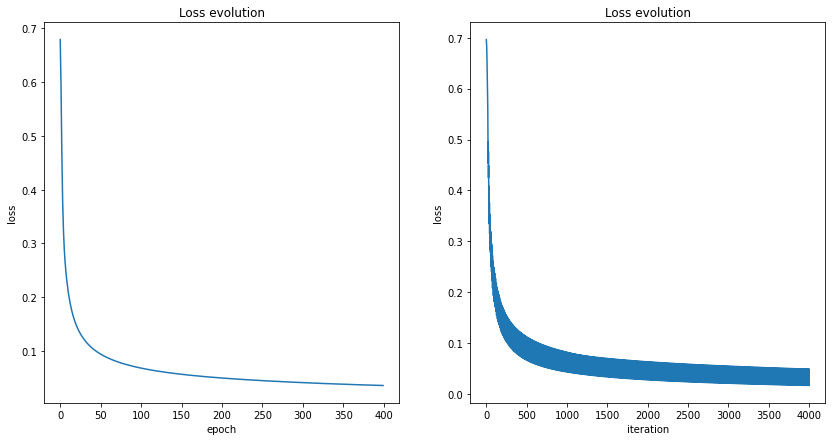

In [9]:
plt.subplot(1, 2, 1)
plt.plot(epoch_errors)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss evolution")
plt.subplot(1, 2, 2)
plt.plot(iteration_errors)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title("Loss evolution")
plt.show()

In [10]:
Y_predicted = docknet.predict(X_test)
Y_predicted = np.round(Y_predicted)
correct = Y_predicted == Y_test
wrong = Y_predicted != Y_test
X_correct = X_test[:, correct.reshape(test_size)]
Y_correct = Y_test[correct]
X_wrong = X_test[:, wrong.reshape(test_size)]
Y_wrong = Y_test[wrong]

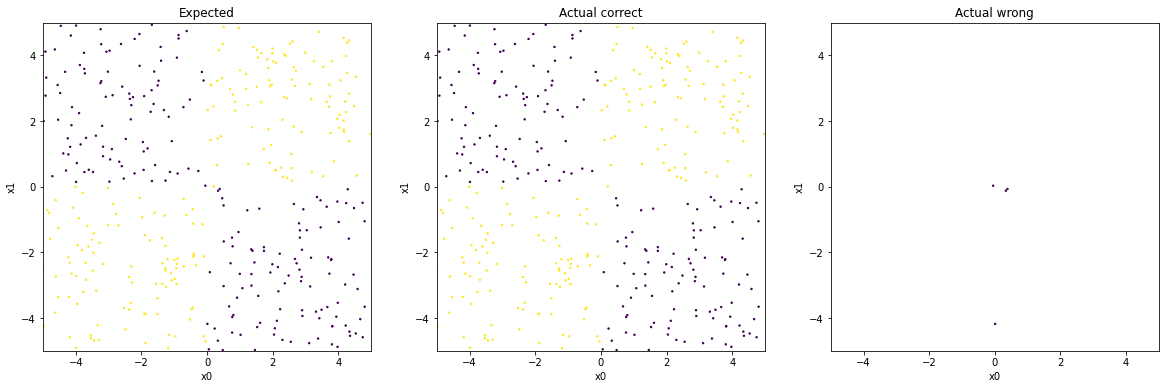

In [11]:
plt.rcParams['figure.figsize'] = [20, 10]
f, axes = plt.subplots(nrows=1, ncols=3)
scatterplot(axes[0], X_test, Y_test, 'Expected', 1, 3, 1, x0_range, x1_range)
scatterplot(axes[1], X_correct, Y_correct, 'Actual correct', 1, 3, 2, x0_range, x1_range)
scatterplot(axes[2], X_wrong, Y_wrong, 'Actual wrong', 1, 3, 3, x0_range, x1_range)
plt.show()

In [13]:
results = metrics.classification_report(Y_test[0], Y_predicted[0])
print(results)

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       200
         1.0       0.98      1.00      0.99       200

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [14]:
conf_matrix = metrics.confusion_matrix(Y_test[0], Y_predicted[0])
print(conf_matrix)

[[196   4]
 [  0 200]]
